In [2]:
# Let's import all necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [11]:
# Read the file using Pandas  
data=pd.read_csv('cars_MPG.csv')
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [12]:
data.shape       #shape of the dataset

(398, 9)

In [13]:
data.info()       #basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [14]:
data.describe()      #describing the dataset statistically

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
data.isnull().sum()       #checking null values     

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [18]:
data.horsepower.unique()    #checking unique values

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [17]:
data.isna().sum()   #checking nan values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [20]:
data = data[data.horsepower != '?']     #changing ? with !

In [21]:
'?' in data    #rechecking

False

In [25]:
data.horsepower = data.horsepower.astype('float')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

# EDA

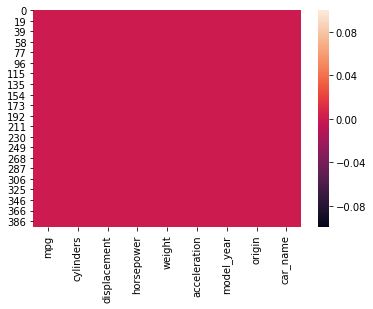

In [26]:
sns.heatmap(data.isnull())

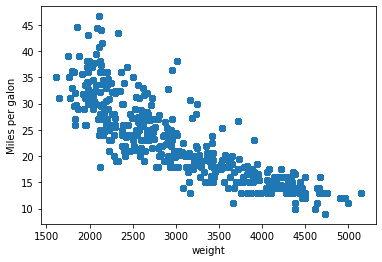

In [72]:
plt.scatter(data['weight'],data['mpg'])
plt.xlabel("weight")
plt.ylabel("Miles per galon")
plt.show()  

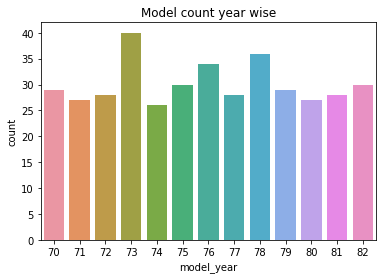

In [29]:
sns.countplot(data['model_year'])
plt.title('Model count year wise')
plt.show()

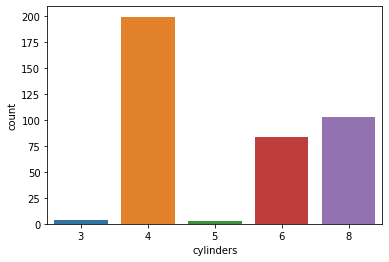

In [27]:
sns.countplot(data.cylinders,data=data)
plt.show() 

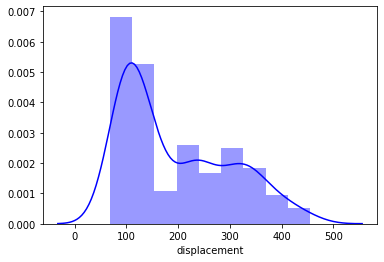

In [31]:
#Let's see distribution of the Displacement of automobile 
sns.distplot(data.displacement, color='b')
plt.show()

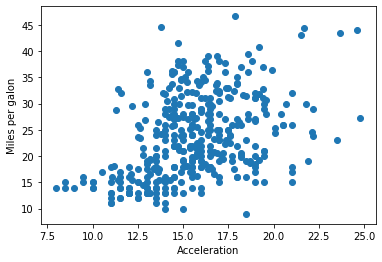

In [19]:
plt.scatter(data['acceleration'],data['mpg'])
plt.xlabel("Acceleration")
plt.ylabel("Miles per galon")
plt.show() 

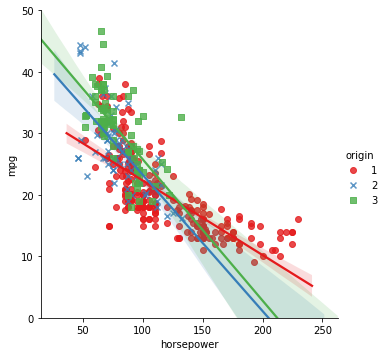

In [36]:
hp = 'horsepower'
plot = sns.lmplot(hp,'mpg',data=data,hue='origin',  markers=["o", "x", "s"], palette="Set1")
plot.set(ylim = (0,50))

<Figure size 1440x720 with 0 Axes>

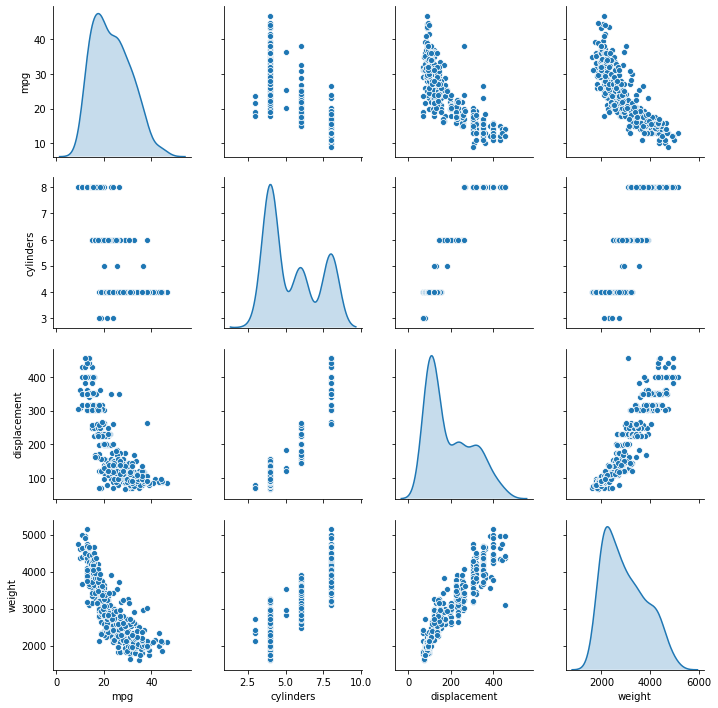

In [35]:
plt.figure(figsize=(20,10))
sns.pairplot(data[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")
plt.show()

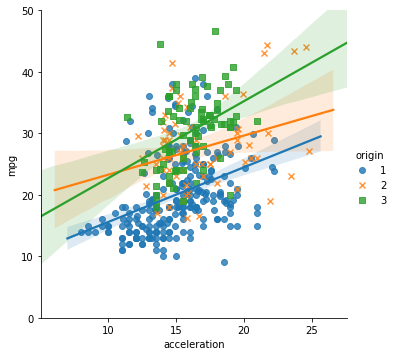

In [37]:
acc = 'acceleration'
plot = sns.lmplot(acc,'mpg',data=data,hue='origin', markers=["o", "x", "s"])
plot.set(ylim = (0,50))

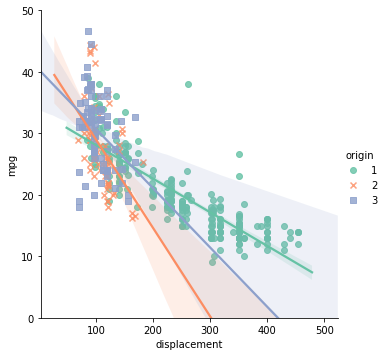

In [39]:
acc = 'displacement'
plot = sns.lmplot(acc,'mpg',data=data,hue='origin', markers=["o", "x", "s"],  palette="Set2")
plot.set(ylim = (0,50))

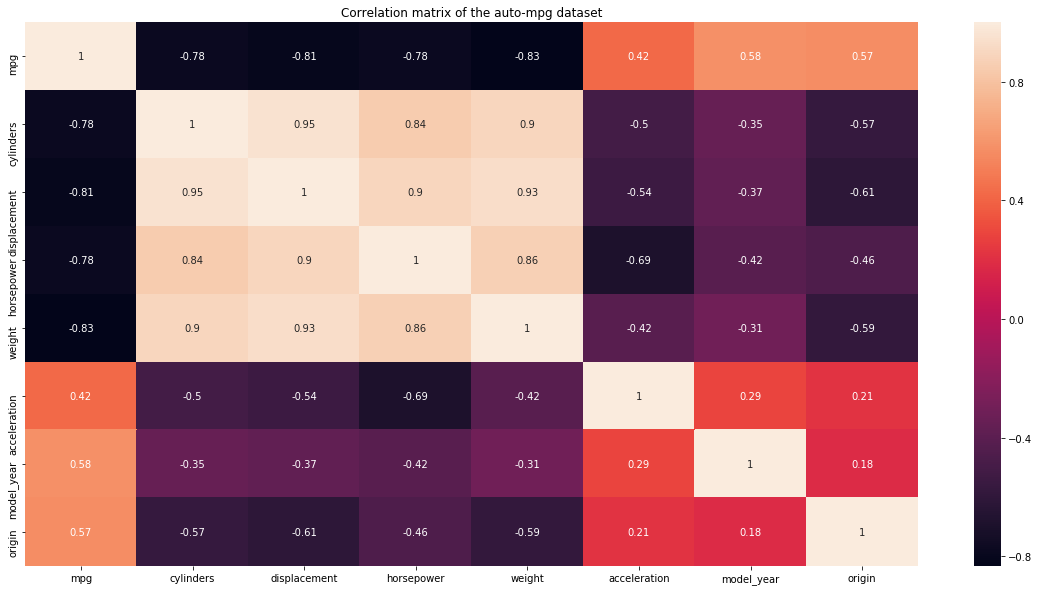

In [40]:
# Let's plot correlation matrix
plt.figure(figsize=(20,10))
corr_=data.corr()
g=sns.heatmap(corr_,annot=True)
g.set(title='Correlation matrix of the auto-mpg dataset')
plt.show() 

In [42]:
data=data.drop(['car_name'], axis=1)  #lets drop the column as its of no use to us

In [43]:
data.skew()     #let's check the skewness

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model_year      0.019688
origin          0.915185
dtype: float64

In [44]:
from scipy import stats               #removing skewness by using Z score
z = np.abs(stats.zscore(data))
print(z)

[[0.69863841 1.48394702 1.07728956 ... 1.285258   1.62531533 0.71664105]
 [1.08349824 1.48394702 1.48873169 ... 1.46672362 1.62531533 0.71664105]
 [0.69863841 1.48394702 1.1825422  ... 1.64818924 1.62531533 0.71664105]
 ...
 [1.09737414 0.86401356 0.56847897 ... 1.4304305  1.63640964 0.71664105]
 [0.5842277  0.86401356 0.7120053  ... 1.11008813 1.63640964 0.71664105]
 [0.96908753 0.86401356 0.72157372 ... 1.40043312 1.63640964 0.71664105]]


In [45]:
threshold = 3
print(np.where(z > 3))

(array([  6,   8,  13,  94, 115, 297, 388], dtype=int64), array([3, 3, 3, 3, 3, 5, 5], dtype=int64))


In [46]:
data= data[(z < 3)]
data.shape

(3129, 8)

# Train Test Split

In [47]:
# Lets divide data set into dependen
x=data.drop(['mpg'], axis=1)
y=data['mpg']
print(x.shape)
print(y.shape)

(3129, 7)
(3129,)


In [48]:
from sklearn.preprocessing import StandardScaler    #standard scaling
sc = StandardScaler()
x = sc.fit_transform(x)

In [49]:
from sklearn.preprocessing import MinMaxScaler    #min max scaler to scale the data
mms=MinMaxScaler()
x=mms.fit_transform(x)

In [51]:
x=data['mpg'].values.reshape(-1,1)      # reshaping
print(x.shape)

(3129, 1)


In [53]:
# Importing necessary libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =45,test_size=0.30)

In [56]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred= lr.predict(x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred) )

RMSE is:  2.4811907361331634e-15
r2_score is:  1.0


In [58]:
cross_val_score(lr,x,y,cv=10,scoring='r2').mean()

1.0

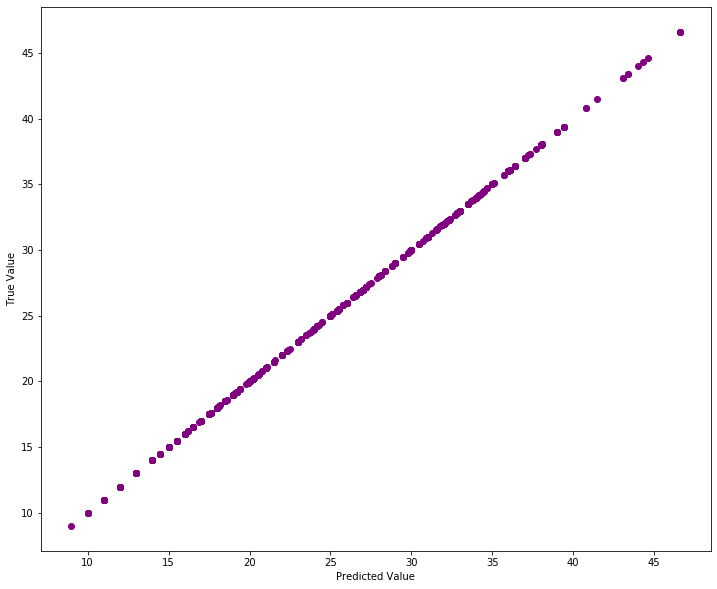

In [59]:
plt.figure(figsize=(12,10))     #plotting the predictions
plt.scatter(y_pred, y_test, color='purple')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

# Ridge and Lasso

In [60]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_test,y_test)

0.9999999999429917

In [62]:
pred=rd.predict(x_test)
pred

array([33.49992396, 26.99997303, 13.00007873, 23.99999568, 23.99999568,
       20.00002588, 15.00006363, 27.99996548, 20.00002588, 17.50004476,
       18.00004098, 36.99989753, 36.39990206, 24.99998813, 32.99992773,
       32.29993302, 14.00007118, 16.00005608, 35.99990508, 36.99989753,
       23.00000323, 35.99990508, 17.50004476, 21.10001758, 19.00003343,
       34.99991263, 18.00004098, 20.00002588, 19.10003268, 15.50005986,
       27.99996548, 16.00005608, 20.00002588, 19.00003343, 14.00007118,
       37.99988998, 23.00000323, 18.00004098, 24.99998813, 33.99992018,
       26.99997303, 32.79992924, 32.19993377, 18.00004098, 19.00003343,
       16.50005231, 37.99988998, 14.00007118, 46.59982506, 16.00005608,
       24.49999191, 14.00007118, 23.00000323, 17.600044  , 24.99998813,
       18.10004023, 17.00004853, 22.00001078, 37.99988998, 35.09991188,
       18.00004098, 22.00001078, 15.00006363, 18.00004098, 29.89995114,
       21.50001456, 33.49992396, 19.20003192, 12.00008628, 27.99

In [63]:
 cross_val_score(rd,x,y,cv=10,scoring='r2').mean()

0.9999999999288576

In [64]:
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.9997265784464922

In [66]:
pred=ls.predict(x_test)
pred

array([33.3334701 , 26.94094455, 13.17242797, 23.99054814, 23.99054814,
       20.05668626, 15.13935891, 27.92441002, 20.05668626, 17.59802258,
       18.08975532, 36.77559924, 36.18551996, 24.97401361, 32.84173737,
       32.15331154, 14.15589344, 16.12282438, 35.79213378, 36.77559924,
       23.00708267, 35.79213378, 17.59802258, 21.13849828, 19.07322079,
       34.80866831, 18.08975532, 20.05668626, 19.17156734, 15.63109164,
       27.92441002, 16.12282438, 20.05668626, 19.07322079, 14.15589344,
       37.75906471, 23.00708267, 18.08975532, 24.97401361, 33.82520284,
       26.94094455, 32.64504427, 32.05496499, 18.08975532, 19.07322079,
       16.61455711, 37.75906471, 14.15589344, 46.21686775, 16.12282438,
       24.48228087, 14.15589344, 23.00708267, 17.69636913, 24.97401361,
       18.18810187, 17.10628985, 22.0236172 , 37.75906471, 34.90701485,
       18.08975532, 22.0236172 , 15.13935891, 18.08975532, 29.79299441,
       21.53188446, 33.3334701 , 19.26991388, 12.1889625 , 27.92

In [67]:
cross_val_score(ls,x,y,cv=10,scoring='r2').mean()

0.9994357822755259

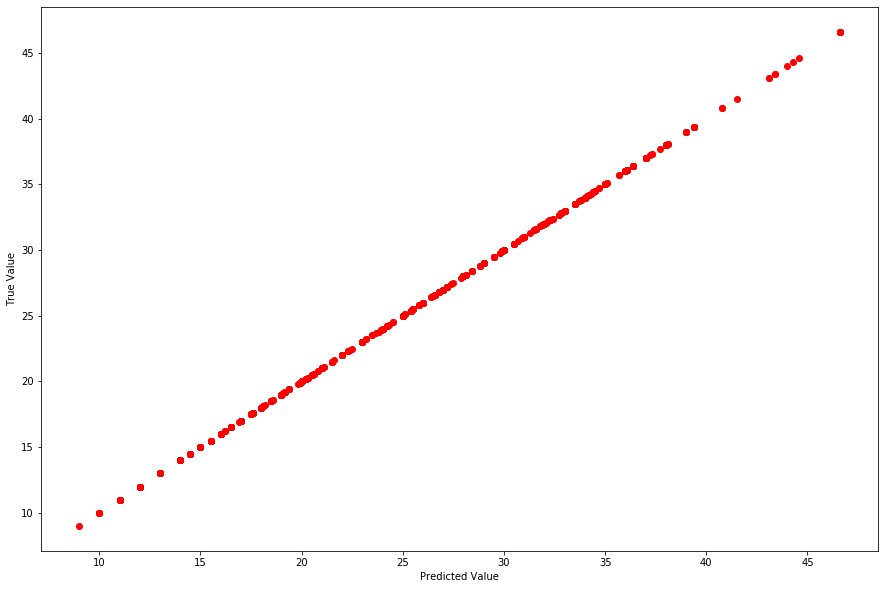

In [73]:
plt.figure(figsize=(15,10))     #plotting the predictions
plt.scatter(y_pred, y_test, color='red')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

In [68]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_test,y_test)

1.0

In [69]:
pred=dtr.predict(x_test)
pred

array([33.5, 27. , 13. , 24. , 24. , 20. , 15. , 28. , 20. , 17.5, 18. ,
       37. , 36.4, 25. , 33. , 32.3, 14. , 16. , 36. , 37. , 23. , 36. ,
       17.5, 21.1, 19. , 35. , 18. , 20. , 19.1, 15.5, 28. , 16. , 20. ,
       19. , 14. , 38. , 23. , 18. , 25. , 34. , 27. , 32.8, 32.2, 18. ,
       19. , 16.5, 38. , 14. , 46.6, 16. , 24.5, 14. , 23. , 17.6, 25. ,
       18.1, 17. , 22. , 38. , 35.1, 18. , 22. , 15. , 18. , 29.9, 21.5,
       33.5, 19.2, 12. , 28. , 18.6, 26. , 21.6, 26. , 13. , 13. , 26. ,
       25. , 19. , 22. , 28. , 29.9, 20. , 15. , 20.5, 34.4, 32. , 24. ,
       32.9, 35. , 13. , 27. , 26. , 33.8, 29. , 16. , 23. , 25. , 32.8,
       20.2, 32.1, 23. , 13. , 17.5, 27. , 30. , 14. , 26. , 18. , 16.5,
       37. , 17. , 38. , 14.5, 36. , 17. , 18.5, 26.8, 18. , 26.8, 17. ,
       14. , 35. , 11. , 14. , 14.5, 14. , 18. , 25.4, 28. , 20. , 28. ,
       16.5, 17. , 14. , 18. , 31. , 21. , 26. , 23.7, 21. , 26.4, 28. ,
       26. , 15. , 18. , 17.6, 31. , 25.8, 31. , 25

In [70]:
cross_val_score(dtr,x,y,cv=10,scoring='r2').mean()

0.9986577788831699

In [71]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

0.9999967398798373

In [74]:
pred=rfr.predict(x_test)

In [75]:
pred

array([33.5 , 27.  , 13.  , 24.  , 24.  , 20.  , 15.  , 28.  , 20.  ,
       17.5 , 18.  , 37.  , 36.34, 25.  , 33.  , 32.29, 14.  , 16.  ,
       36.  , 37.  , 23.  , 36.  , 17.5 , 21.1 , 19.  , 35.  , 18.  ,
       20.  , 19.1 , 15.5 , 28.  , 16.  , 20.  , 19.  , 14.  , 38.  ,
       23.  , 18.  , 25.  , 34.  , 27.  , 32.8 , 32.2 , 18.  , 19.  ,
       16.5 , 38.  , 14.  , 46.6 , 16.  , 24.5 , 14.  , 23.  , 17.6 ,
       25.  , 18.1 , 17.  , 22.  , 38.  , 35.1 , 18.  , 22.  , 15.  ,
       18.  , 29.89, 21.5 , 33.5 , 19.2 , 12.  , 28.  , 18.6 , 26.  ,
       21.6 , 26.  , 13.  , 13.  , 26.  , 25.  , 19.  , 22.  , 28.  ,
       29.89, 20.  , 15.  , 20.5 , 34.41, 32.  , 24.  , 32.9 , 35.  ,
       13.  , 27.  , 26.  , 33.8 , 29.  , 16.  , 23.  , 25.  , 32.8 ,
       20.2 , 32.1 , 23.  , 13.  , 17.5 , 27.  , 30.  , 14.  , 26.  ,
       18.  , 16.5 , 37.  , 17.  , 38.  , 14.35, 36.  , 17.  , 18.5 ,
       26.74, 18.  , 26.74, 17.  , 14.  , 35.  , 11.  , 14.  , 14.35,
       14.  , 18.  ,

In [76]:
cross_val_score(rfr,x,y,cv=10,scoring='r2').mean()

0.9986576181979385

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 0.002161874334399126
Mean squared error: 0.00019861554845580583
Root Mean Squared Error: 0.01409310286827588


In [78]:
from sklearn.externals import joblib    #save the project through joblib
joblib.dump(rfr, 'rfr_MPg_auto.pkl')

D:\users\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['rfr_MPg_auto.pkl']